# Pset 5 Problem 3

In [ ]:
using CSV, DataFrames
using JuMP, Gurobi
using Random, Plots

# Load Data
dataA = CSV.read("data/dataA.csv", DataFrame)
dataB = CSV.read("data/dataB.csv", DataFrame)

# Extract variables
X1_A, X2_A, y_A = dataA[:, 1], dataA[:, 2], dataA[:, 3]
X1_B, X2_B, y_B = dataB[:, 1], dataB[:, 2], dataB[:, 3]
n = length(y_A)  # Number of samples

1200

In [105]:
# Loss Function
function compute_loss(beta_1, beta_2)
    loss = 0.0
    for i in 1:n
        loss += min((y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])^2,
                                    (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])^2)
    end
    return (1/(2*n)) * loss
end

# function compute_d_loss(beta_1, beta_2)
#     dloss_1 = 0.0
#     dloss_2 = 0.0
#     for i in 1:n
#         dloss_1 += -X1_A[i] - 

#     return dloss_1, dloss_2
# end

# Gradient Computation
function compute_gradient(beta_1, beta_2)
    dbeta_1, dbeta_2 = 0.0, 0.0
    for i in 1:n
        # (y_a - beta1*xA1 - beta1*xA2)^2
        # 2*(y_a - beta1*xA1 - beta2*xA2)*(-xA1) -> dbeta_1
        # 2*(y_a - beta1*xA1 - beta2*xA2)*(-xA2)
        lossA = (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])^2
        lossB = (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])^2
        if lossA < lossB
            dbeta_1 += 2 * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i]) * (-X1_A[i])
            dbeta_2 += 2 * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i]) * (-X2_A[i])
        else
            dbeta_1 += 2 * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i]) * (-X1_B[i])
            dbeta_2 += 2 * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i]) * (-X2_B[i])

        end
    end
    return (1/(2*n)) * dbeta_1, (1/(2*n)) * dbeta_2
    # return dbeta_1, dbeta_2
end

# Gradient Descent Implementation
function gradient_descent(learning_rate, iterations, beta_init)
    beta_1, beta_2 = beta_init
    trajectory = [(beta_1, beta_2)]
    for iter in 1:iterations
        dbeta_1, dbeta_2 = compute_gradient(beta_1, beta_2)
        if iter == 1
            println(dbeta_1, dbeta_2)
        end
        beta_1 = beta_1 - learning_rate * dbeta_1
        beta_2 = beta_2 - learning_rate * dbeta_2
        push!(trajectory, (beta_1, beta_2))
    end
    return beta_1, beta_2, trajectory
end


gradient_descent (generic function with 1 method)

In [ ]:
# Stochastic Gradient Descent
function stochastic_gradient_descent(learning_rate, iterations, beta__init)
    beta_1, beta_2 = beta__init
    trajectory = [(beta_1, beta_2)]
    for iter in 1:iterations
        a_or_b = rand()
        i = rand(1:size(y_A))
        dbeta_1, dbeta_2 = 0.0, 0.0
        lossA = (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])^2
        lossB = (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])^2
        if lossA < lossB
            dbeta_1 += (1 / batch_size) * X1_A[i] * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])
            dbeta_2 += (1 / batch_size) * X2_A[i] * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])
        else
            dbeta_1 += (1 / batch_size) * X1_B[i] * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])
            dbeta_2 += (1 / batch_size) * X2_B[i] * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])
        end
        beta_1 -= learning_rate * dbeta_1
        beta_2 -= learning_rate * dbeta_2
        push!(trajectory, (beta_1, beta_2))
    end
    return beta_1, beta_2, trajectory
end

stochastic_gradient_descent (generic function with 2 methods)

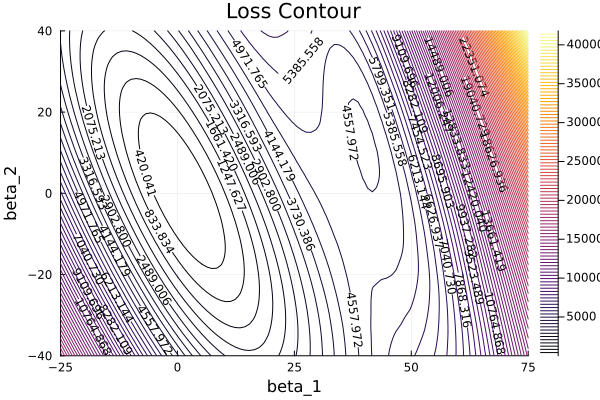

In [ ]:

function plot_loss(beta_1_range, beta_2_range)
    beta_1_grid = LinRange(beta_1_range[1], beta_1_range[2], 100)
    beta_2_grid = LinRange(beta_2_range[1], beta_2_range[2], 100)
    loss_grid = [compute_loss(beta_1, beta_2) for beta_2 in beta_2_grid, beta_1 in beta_1_grid]
    init_loss = loss_grid
    contour(beta_1_grid, beta_2_grid, loss_grid, levels=100, xlabel="beta_1", ylabel="beta_2", title="Loss Contour", clabels=true,)

end

plot_loss([-25, 75], [-40,40])
# savefig("loss_contour.png")

In [127]:
#Visualization
function plot_trajectories(trajectory, beta_1_range, beta_2_range, title = "Loss Contour")
    beta_1_grid = range(beta_1_range[1], beta_1_range[2], length=100)
    beta_2_grid = range(beta_2_range[1], beta_2_range[2], length=100)
    loss_grid = [compute_loss(beta_1, beta_2) for  beta_2 in beta_2_grid, beta_1 in beta_1_grid]
    plot([beta_[1] for beta_ in trajectory], [beta_[2] for beta_ in trajectory], linestyle = :dash,
    linewidth = 2, color=:red, label="Trajectory", markershape = :circle)
    contour!(beta_1_grid, beta_2_grid, loss_grid, levels=100, xlabel="beta_1", ylabel="beta_2", title=title, clabels=true)
    scatter!([45.0], [-15.0], markershape=:star, markersize = 10, label="Starting Point")
end

plot_trajectories (generic function with 2 methods)

22.927254334190735-20.69532099012803


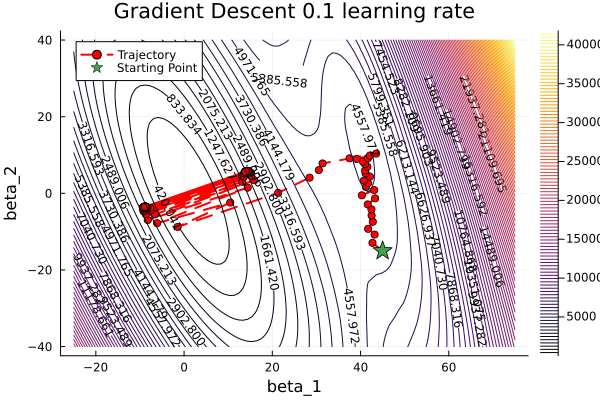

In [128]:
# Run Gradient Descent #1
beta_init = (45.0, -15.0)
learning_rate = 0.1
iterations = 200
beta_1, beta_2, trajectory = gradient_descent(learning_rate, iterations, beta_init)

# Plot Gradient Descent
plot_trajectories(trajectory, [-25, 75], [-40, 40], "Gradient Descent 0.1 learning rate")
# savefig("GradDesc1.png")

22.927254334190735-20.69532099012803


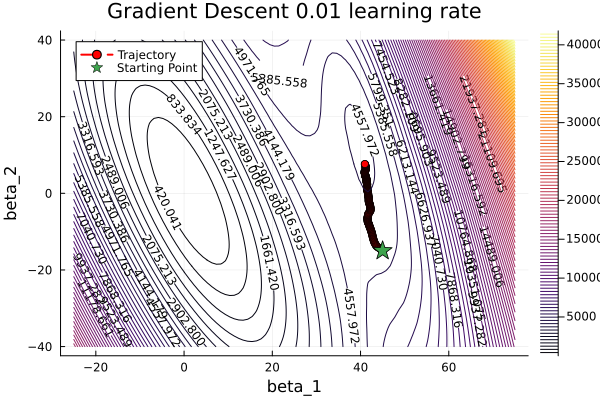

In [129]:
# Run Gradient Descent #2
beta__init = (45.0, -15.0)
learning_rate = 0.01
iterations = 200
beta_1, beta_2, trajectory = gradient_descent(learning_rate, iterations, beta__init)

# Plot Gradient Descent
plot_trajectories(trajectory, [-25, 75], [-40, 40], "Gradient Descent 0.01 learning rate")
# savefig("GradDesc2.png")

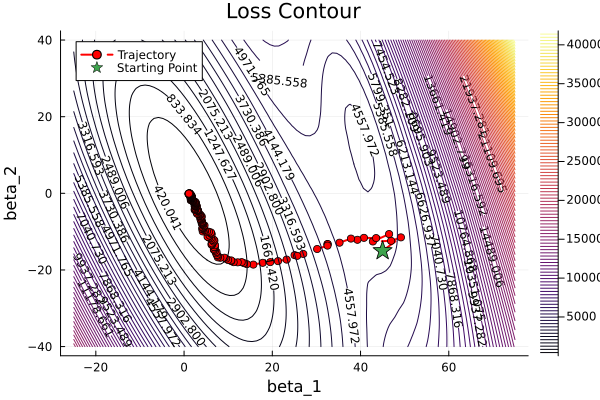

In [132]:
# Run Stochastic Gradient Descent
beta_inits = [(rand(-25:75), rand(-40:40)) for i in 1:3]
learning_rate = 0.01
iterations = 200
trajects = []

beta_init = (45.0, -15.0)
beta_1_sgd, beta_2_sgd, sgd_trajectory = stochastic_gradient_descent(learning_rate, iterations, beta_init, 10)
plot_trajectories(sgd_trajectory, [-25, 75], [-40, 40])